In [2]:
%run "preamble.ipynb"
%matplotlib inline
import torch
from torch.autograd import Variable
from dl4nlp.util import *
from dl4nlp.einsum import einsum
from torch import nn
import torch.nn.functional as F
import numpy as np
from torch.nn import Parameter
from dl4nlp.tikz import *
from dl4nlp.rnn import *
import IPython.display
IPython.display.display_latex(IPython.display.Latex(filename="tex/macros.tex"))

<IPython.core.display.Javascript object>

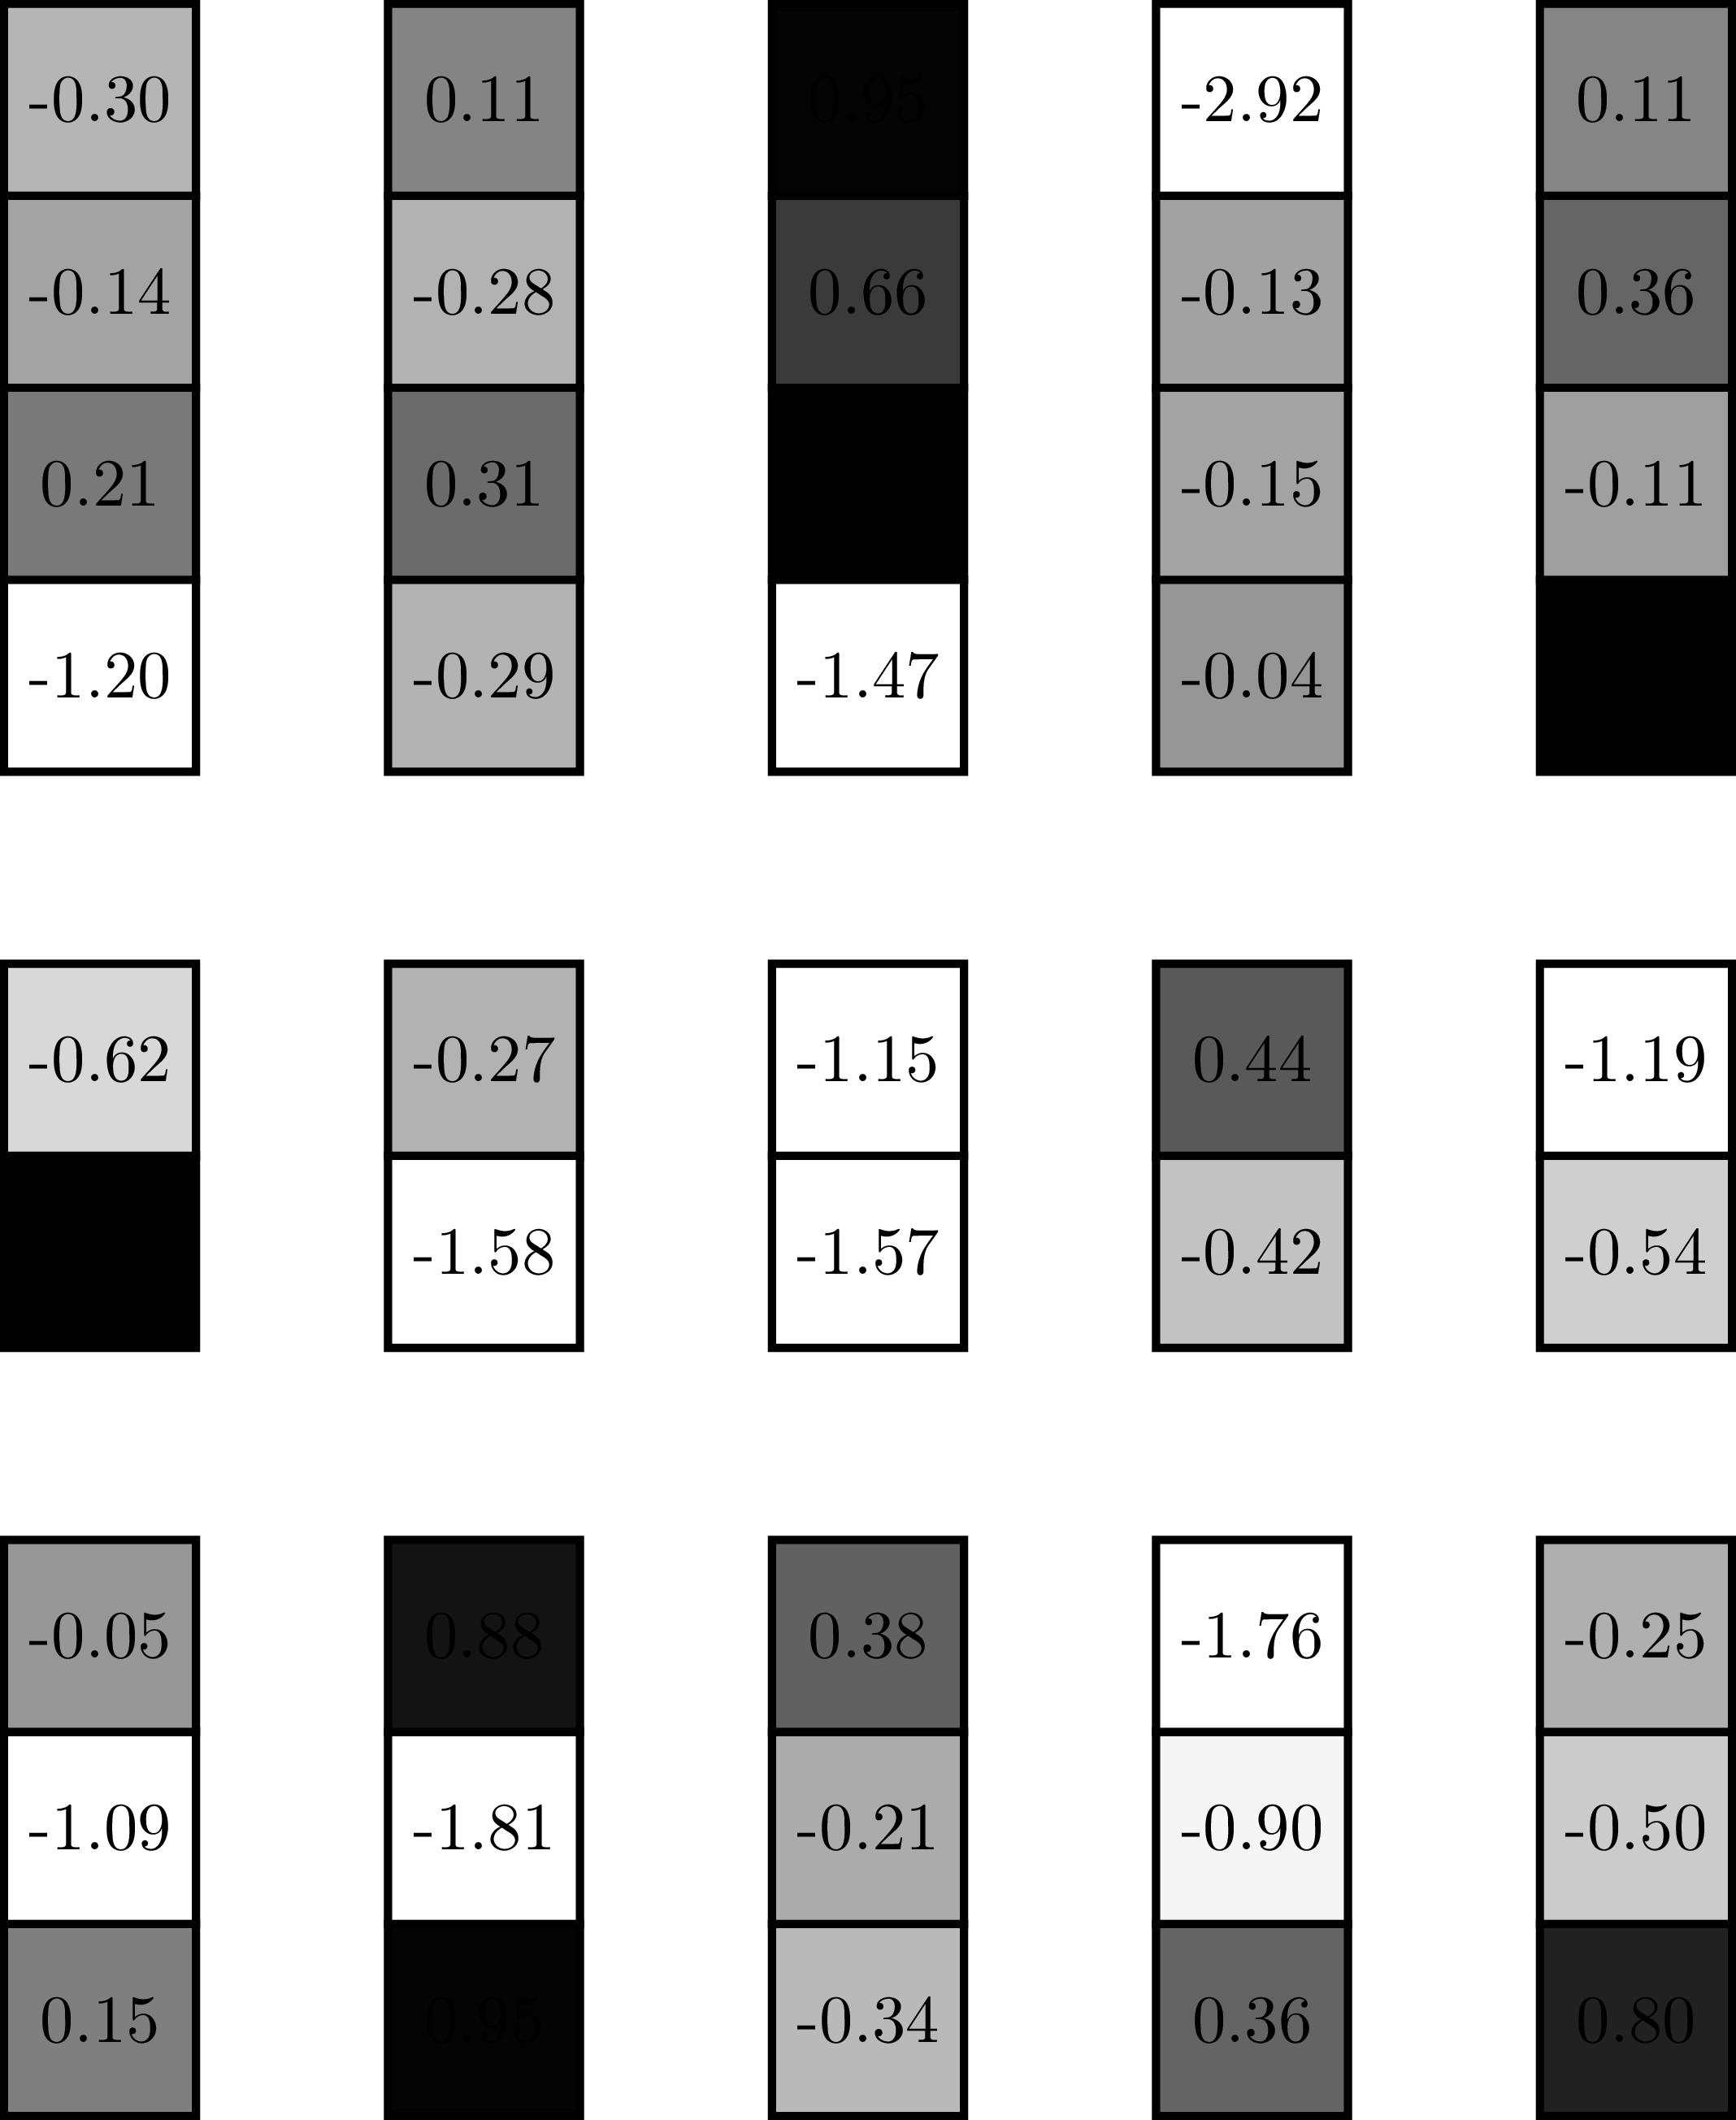

In [55]:
import math

X = torch.randn(5, 3)
Y = torch.randn(5, 2)
Z = torch.randn(5, 4)


def plot_vec(v, xmax=1, ymax=-1):
    diff = xmax - ymax
    tmp = ""
    for i in range(len(v)):
        f = "fill=black!%2.2f" % ((v[i] - ymax) / diff  * 100)
        tmp += "\draw[%s] (-0.5, %d) rectangle (0.5, %d);\n" % (f, i, i+1)
        tmp += r"\node[] at (0.0, %d+0.5) {%2.2f};" % (i, v[i]) + "\n"
    return tmp

def plot_tikz(xs, xdist=1, ydist=1):
    tmp = ""
    yshift = 0
    for l, M in enumerate(xs):
        # print(M)
        # print(yshift)
        assert len(M.size()) == 2
        # todo: get max and min value in matrix and color vector accordingly
        xmax = M.max()
        xmin = M.min()
        if yshift > 0:
            tmp += r"\begin{scope}[shift={(0,%d)}]" % yshift + "\n"
        for i in range(M.size(0)):
            tmp += r"\begin{scope}[shift={(%d,0)}]" % (i * (xdist + 1)) + "\n"
            tmp += plot_vec(M[i,:])
            tmp += r"\end{scope}" + "\n"
        if yshift > 0:
            tmp += r"\end{scope}" + "\n"
        yshift += M.size(1) + ydist
    return tmp

fig = plot_tikz([X, Y, Z])
# print(fig)
tikz(fig)